# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](#ex2)

---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

### 1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

$\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a sequence of random variables with values in S={0,1,2,...,N}.

The probability of the next state just depends on the actual state, and does not care about the previous state. It is a memory-less process.

### 2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

From each state we can reach any other state with a positive probability, so there is only one communication class, so the chain is irreducible.

As the chain is irreducible and the number of states values are finite, the chain is recurrent.

When we are in an even state, (X(n) = 2k, k in $\mathbb{N}$), the next state will automatically be an odd state, which is true on both ways. So the chain is 2-periodic.

### 3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

We have $p_{i,i+1} = \frac{i+1}{K}$ 

$p_{i,i-1} = \frac{K - (i-1)}{K}$

And $p_{i,j} = 0$ for any other case.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
K = 30
D1 = np.arange(1,K+1)/K
D2 = np.flip(D1)
P = np.diag(D2,k=1) + np.diag(D1,k=-1)

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

In [3]:
Pi = stats.binom(K,0.5).pmf(np.arange(0,K+1))
print(np.round(Pi@P-Pi,15))

[-0.  0.  0. -0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0. -0.  0.
 -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.]


We see here that the difference of Pi and Pi.P is 0, if we forget about the machine precision.

5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.


In [33]:
def ehrenfest(K,nmax = 10):
    A = 0
    B = K
    res=np.zeros(nmax+1)
    n=0
    while n<nmax:
        p = np.random.rand()
        if p <= A/K:
            A-=1
            B+=1
        else:
            B-=1
            A+=1
        n+=1
        res[n] = A
    return res

6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

14.933413317336532


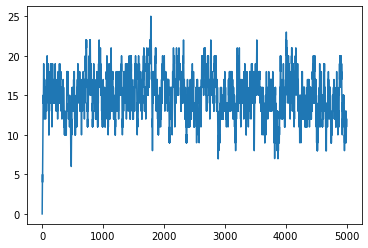

In [34]:
X = ehrenfest(30,nmax = 5000)
print(np.mean(X))
plt.plot(range(len(X)),X)
plt.show()

The curve seems to turn around 15 which correspond to K/2. 

7\. Compare the empirical histogram of the trajectory obtained in 5. to the theoretical limit distribution $\pi$. What do you observe?

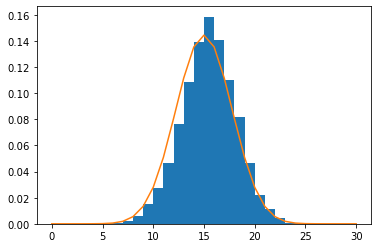

In [35]:
plt.hist(X,bins = range(0,K+1),density=True)
plt.plot(range(len(Pi)),Pi)
plt.show()

8\. a) Modify the function defined in 5. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

In [53]:
def ehrenfest_time(K,nmax = 5000):
    A = 0
    B = K
    n=0
    reached= False
    while (not reached) and (n<nmax):
        p = np.random.rand()
        if p <= A/K:
            A-=1
            B+=1
        else:
            B-=1
            A+=1
        n+=1
        if A==0:
            reached = True
    return n

print(ehrenfest_time(10))

2268


8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

In [72]:
N=1000
K=10
L=np.zeros(N)
for i in range(N):
    L[i] = ehrenfest_time(K,500000)

Pi = stats.binom(K,0.5).pmf(np.arange(0,K+1))

print(1/Pi[0],np.mean(L))

1024.0 997.672


We observe that the empirical mean of $T_{0,0}$ is not far from the inverse of $\pi(0)$

8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

...

---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu$ and transition matrix $P$

$$
     \mu = [0, 1, 0, 0, 0, 0], 
     %
     \quad
     %
     P = \begin{pmatrix}
       1/2   & 1/2 &0  &0   &0   &0   \\
	 	1/4 &0   &0  &1/4 &1/4 &1/4   \\
       1/2   &0   &0  &0   &0   &1/2 \\
       0   &1/2 &0  &0   &1/2 &0   \\
       0   &1/3 &0  &1/3 &0   &1/3 \\
       0   &1/3 &1/3  & 0 &1/3   &0
     \end{pmatrix}.
 $$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$;
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [33]:
def simulate_dthmc(P,mu,nmax):
    N=len(mu)
    res = np.zeros(nmax)
    mu = np.nonzero(mu)[0][0]
    res[0] = mu
    for i in range(nmax-1):
        mu = np.random.choice(range(N),p=P[mu])
        res[i+1] = mu 
    return res  



3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

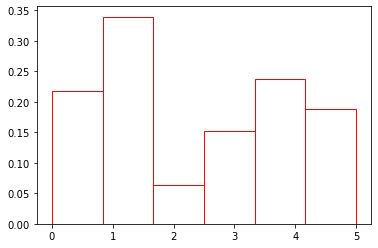

In [52]:

P =np.array(
    [[1/2, 1/2, 0, 0, 0, 0 ],
    [1/4, 0, 0, 1/4, 1/4, 1/4],
    [1/2, 0, 0, 0, 0, 1/2],
    [0, 1/2, 0, 0, 1/2, 0],
    [0,1/3, 0, 1/3, 0, 1/3],
    [0 , 1/3, 1/3, 0 ,1/3, 0]])

mu = np.array([1,0,0,0,0,0])

traj = simulate_dthmc(P,mu,2000)

plt.hist(traj,bins = len(mu),density=True,color = 'white',edgecolor='red')
plt.show()

4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

4
[0.19141914 0.27722772 0.05280528 0.1320132  0.18811881 0.15841584]


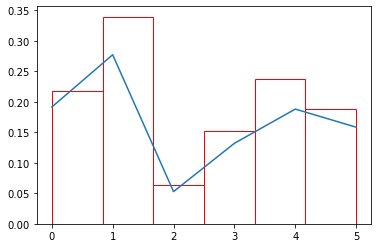

In [89]:
a,eig_vecs = np.linalg.eig(P.T)
pi=[]
for vec in eig_vecs.T:
    if np.linalg.norm((vec.imag)) == 0:
        pi.append(vec.real)
print(len(pi))
pi = pi[0]/np.sum(pi[0])
print(pi)
plt.hist(traj,bins = len(mu),density=True,color = 'white',edgecolor='red')
plt.plot(range(len(pi)),pi)
plt.show()

5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.


5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 1, \dotsc , 6$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?
  

6\. For each state $i \in \{1, \dotsc, 5 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 